In [1]:
# Importing Libraries
import numpy as np
import  pandas as pd
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn.metrics import classification_report
from plot_keras_history import plot_history
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data=pd.read_csv('DATA.csv')

In [3]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data['label']=data['label'].replace(2,1)

In [5]:
X=data['combined_result']
y=data['label']
time_series=data['t_dist']

In [6]:
# Extracting sequences from the dataset
sequences=[]
labels=[]
temp=[]
    
for index,value in y.items():
    if value==1:
        temp.append(X[index])
        if (index+1)<len(y) and y[index+1]==0:
            sequences.append(temp)
            labels.append(1)
            temp=[]
    if value==0:
        temp.append(X[index])
        if (index+1)<len(y) and y[index+1]==1:
            sequences.append(temp)
            labels.append(0)
            temp=[]

In [7]:
# Not a sequence but label is 1 
zero_seq_label_one=[]
for position, sublist in enumerate(sequences):
    if all(element == 0 for element in sublist):
        if labels[position]==1:
            zero_seq_label_one.append(position)

In [8]:
# Replacing those with 0
for value in zero_seq_label_one:
    labels[value]=0

In [9]:
# Is a sequence but label 0
seq_label_zero=[]
for position, sublist in enumerate(sequences):
    if any(element != 0 for element in sublist):
        if labels[position]==0:
            seq_label_zero.append(position)

In [10]:
# Replacing those with 1
for value in seq_label_zero:
    labels[value]=1

In [11]:
print(sequences[2])

[0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
y.value_counts()

0.0    250225
1.0     49770
Name: label, dtype: int64

In [13]:
data_column = []
label_column = []

# Loop through each sublist and label
for seq, label in zip(sequences, labels):
    # Extend the data_column with the values from the sublist
    data_column.extend(seq)
    # Extend the label_column with the label repeated for the length of the sublist
    label_column.extend([label] * len(seq))

# Check if the length of data_column and label_column is the same as the total number of values and labels
if len(data_column) == sum(map(len, sequences)) and len(label_column) == len(data_column):
    # Create a DataFrame
    df = pd.DataFrame({'Data': data_column, 'Label': label_column})

    # Print the DataFrame
    print(df)
else:
    print("There is an issue with the data and label placement.")

         Data  Label
0       0.013      1
1       0.000      1
2       0.004      1
3       0.005      1
4       0.000      1
...       ...    ...
299879  0.015      1
299880  0.000      1
299881  0.040      1
299882  0.053      1
299883  0.010      1

[299884 rows x 2 columns]


In [14]:
df['Label'].value_counts()

0    208498
1     91386
Name: Label, dtype: int64

In [24]:
df.to_csv('Sarmad.csv')

In [30]:
X=df['Data']
y=df['Label']

In [31]:
std_X = X.std()
desired_snr = 0.1
std_noise = std_X * desired_snr
noise = np.random.normal(0, std_noise, X.shape)

In [32]:
df['noisy_feature_column'] = X + noise
noisy_signal=df['noisy_feature_column']

In [33]:
df.head(5)

,Data,Label,noisy_feature_column
0,0.013,1,0.014398
1,0.000,1,-0.005883
2,0.004,1,-0.008957
3,0.005,1,-0.000925
4,0.000,1,-0.007255


<IPython.core.display.Javascript object>


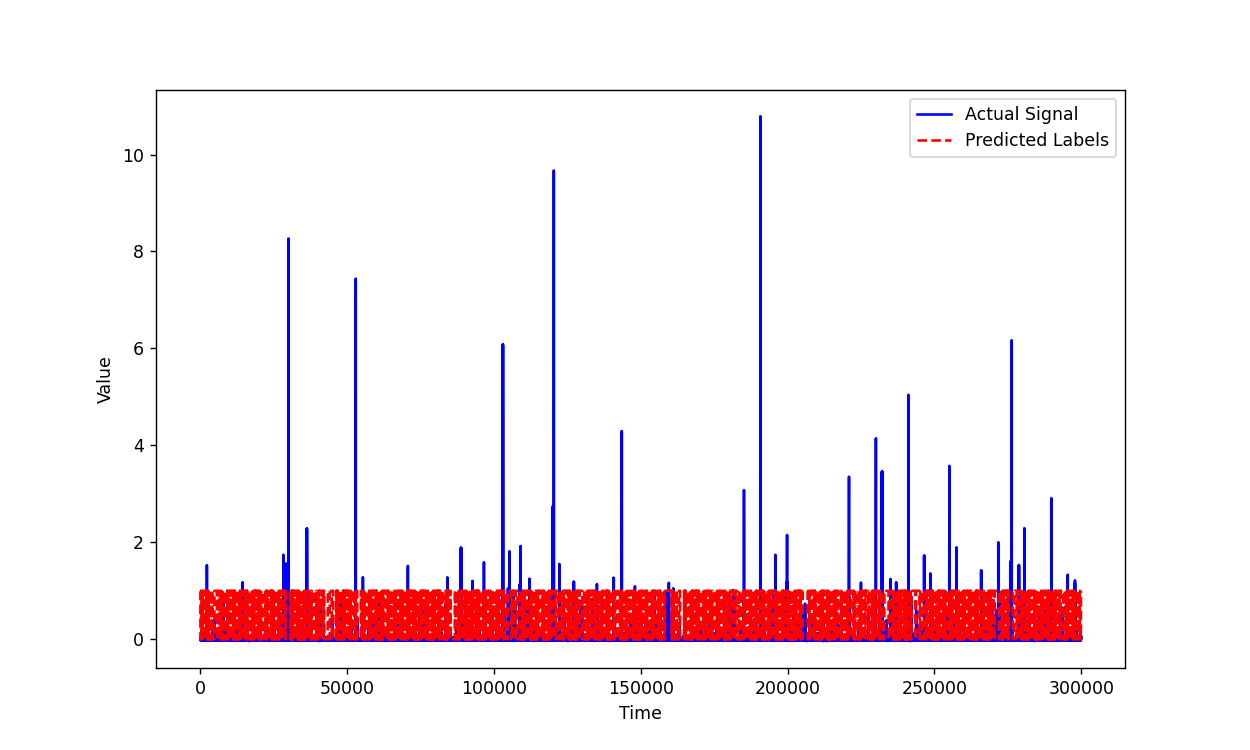

In [35]:
# This Plotting With Boxes Around Signals
plt.figure(figsize=(10,6))
plt.plot(df['noisy_feature_column'],label='Actual Signal',color='blue')
plt.plot(df['Label'],label='Predicted Labels',color='red',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()